In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/UCL/DISSERTATION/turkey_earthquake')

In [ ]:
def list_subdirectories(directory_path):
    subdirectories = [d for d in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, d))]
    return subdirectories

def get_post_disaster_filename(pre_filename,filename_list):
  city = pre_filename.split('_')[0]
  idx = '_'.join(pre_filename.split('_')[-3:-1])
  post_filename = ""
  result = [filename for filename in filename_list if city in filename and idx in filename and 'post_disaster' in filename]
  if len(result) > 0:
    post_filename = result[0]
  return post_filename

base_dir = '/content/drive/MyDrive/UCL/DISSERTATION/turkey_earthquake/'
pred_base_folder = base_dir + 'predict/submission/'
label_base_folder = base_dir + 'labels/copernicus_earthquake_turkey_tile_mask_02-23/'
city_list = list_subdirectories(pred_base_folder)

In [ ]:
# Load the PNG image using PIL
idx = 17
city = city_list[0]
pred_folder = pred_base_folder+city+'/'
label_folder = label_base_folder+city+'/'
file_list = [f for f in sorted(os.listdir(pred_folder)) if "_localization_" in f]
post_file_list = [f for f in sorted(os.listdir(pred_folder)) if "_damage_" in f]
filename = file_list[idx]

pred_loc_path = pred_folder+filename
pred_dmg_path = pred_folder+filename.replace('_localization_','_damage_')
label_loc_path = label_folder+filename.replace('_localization_','_pre_disaster_').replace('_prediction','')
label_dmg_path = label_folder+get_post_disaster_filename(filename,os.listdir(label_folder))
# pred_loc_path = pred_base_folder+"submission/guatemala-volcano_"+id+"_localization_disaster_prediction.png"
# pred_dmg_path = base_dir+"submission/guatemala-volcano_"+id+"_damage_disaster_prediction.png"
# label_loc_path = base_dir+"test/targets/guatemala-volcano_"+id+"_pre_disaster_target.png"
# label_dmg_path = base_dir+"test/targets/guatemala-volcano_"+id+"_post_disaster_target.png"

pred_loc = Image.open(pred_loc_path)
pred_dmg = Image.open(pred_dmg_path)
label_loc = Image.open(label_loc_path)
label_dmg = Image.open(label_dmg_path)

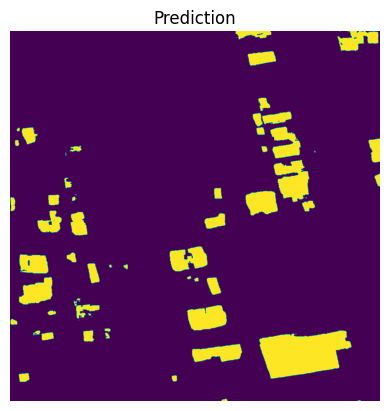

In [ ]:
# Plot the image using matplotlib
plt.imshow(pred_loc)
plt.title("Prediction")
plt.axis("off")  # Turn off axes
plt.show()

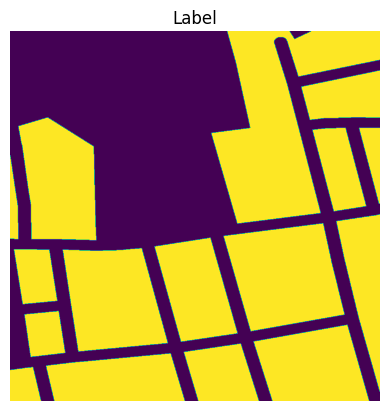

In [ ]:
# Plot the image using matplotlib
plt.imshow(label_loc)
plt.title("Label")
plt.axis("off")  # Turn off axes
plt.show()

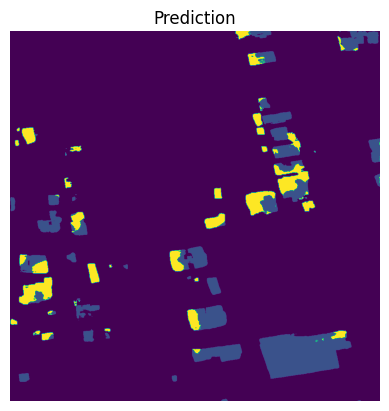

In [ ]:
# Plot the image using matplotlib
plt.imshow(pred_dmg)
plt.title("Prediction")
plt.axis("off")  # Turn off axes
plt.show()

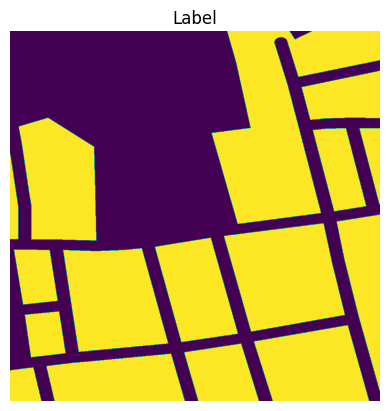

In [ ]:
# Plot the image using matplotlib
plt.imshow(label_dmg)
plt.title("Label")
plt.axis("off")  # Turn off axes
plt.show()

In [ ]:
unique_pred_loc, counts_pred_loc = np.unique(np.array(pred_loc).flatten(), return_counts=True)
unique_label_loc, counts_label_loc = np.unique(np.array(label_loc).flatten(), return_counts=True)

unique_pred_dmg, counts_pred_dmg = np.unique(np.array(pred_dmg).flatten(), return_counts=True)
unique_label_dmg, counts_label_dmg = np.unique(np.array(label_dmg).flatten(), return_counts=True)

print("> Localization")
print("Predict statistics",dict(zip(unique_pred_loc, counts_pred_loc)))
print("Label statistics",dict(zip(unique_label_loc, counts_label_loc)))

print("> Classification")
print("Predict statistics",dict(zip(unique_pred_dmg, counts_pred_dmg)))
print("Label statistics",dict(zip(unique_label_dmg, counts_label_dmg)))

> Localization
Predict statistics {0: 951916, 1: 96660}
Label statistics {0: 457560, 255: 591016}
> Classification
Predict statistics {0: 951916, 1: 66624, 4: 30036}
Label statistics {0: 458253, 1: 590323}


In [ ]:
from utils import *

In [ ]:
dice_score = dice(pred_loc,label_loc)
print(dice_score)

0.2712818245801802


In [ ]:
import numpy as np
from sklearn.metrics import f1_score

def calculate_f1_score(ground_truth, predictions):
    """
    Calculate the F1 score from given ground truth and prediction arrays.

    Returns:
    float: F1 score.
    """
    # Flatten the arrays to 1D arrays
    ground_truth_flat = ground_truth.ravel()
    predictions_flat = predictions.ravel()

    # Calculate the F1 score
    f1 = f1_score(ground_truth_flat, predictions_flat)
    return f1

import numpy as np
from sklearn.metrics import f1_score

def calculate_classwise_f1_harmonic_mean(ground_truth, predictions, num_classes=5):
    """
    Calculate the harmonic mean of class-wise damage classification F1 (F1d).

    Parameters:
    ground_truth (numpy.ndarray): 2D array of ground truth labels (0 to num_classes-1).
    predictions (numpy.ndarray): 2D array of predicted labels (0 to num_classes-1).
    num_classes (int): Number of classes.

    Returns:
    float: Harmonic mean of class-wise F1 scores.
    """
    classwise_f1_scores = []

    for class_label in range(num_classes):
        class_ground_truth = (ground_truth == class_label).astype(int)
        class_predictions = (predictions == class_label).astype(int)

        class_f1 = f1_score(class_ground_truth.ravel(), class_predictions.ravel())
        classwise_f1_scores.append(class_f1)

    harmonic_mean = np.sum(classwise_f1_scores) ** -1
    return harmonic_mean

loc_score = calculate_f1_score(np.array(label_loc),np.array(pred_loc)).round(3)
dmg_score = calculate_classwise_f1_harmonic_mean(np.array(label_dmg),np.array(pred_dmg)).round(3)
overall_score = (loc_score*0.3 + dmg_score*0.7).round(3)
print("Localization F1-Score:",loc_score)
print("Classification F1-Score:",dmg_score)
print("Overall Score:",overall_score)

ValueError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(np.array(label_dmg).ravel(), np.array(pred_dmg).ravel()))

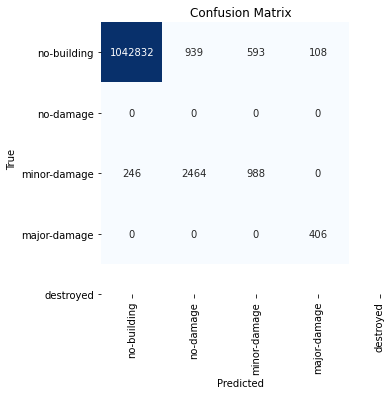

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(confusion_matrix, labels, title='Confusion Matrix', cmap='Blues'):

    plt.figure(figsize=(len(labels), len(labels)))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap=cmap, cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Example usage
ground_truth = np.array([0, 1, 1, 0, 2, 2, 3, 1, 0])
predictions = np.array([0, 1, 1, 0, 1, 2, 3, 1, 2])
labels = ['no-building','no-damage', 'minor-damage', 'major-damage', 'destroyed']

confusion_matrix_result = confusion_matrix(np.array(label_dmg).ravel(), np.array(pred_dmg).ravel())
plot_confusion_matrix(confusion_matrix_result, labels)


In [ ]:
confusion_matrix(np.array(label_dmg).ravel(), np.array(pred_dmg).ravel())

array([[1042832,     939,     593,     108],
       [      0,       0,       0,       0],
       [    246,    2464,     988,       0],
       [      0,       0,       0,     406]])

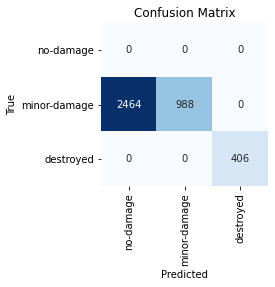

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix_without_class(confusion_matrix, labels, class_to_ignore, title='Confusion Matrix', cmap='Blues'):
    """
    Plot a confusion matrix as a heatmap while ignoring a specific class.

    Parameters:
    confusion_matrix (numpy.ndarray): Confusion matrix.
    labels (list): List of label names.
    class_to_ignore (int): Index of the class to ignore.
    title (str): Title for the plot.
    cmap (str): Colormap for the heatmap.

    Returns:
    None
    """
    modified_confusion_matrix = np.delete(np.delete(confusion_matrix, class_to_ignore, axis=0), class_to_ignore, axis=1)
    modified_labels = labels[:class_to_ignore] + labels[class_to_ignore+1:]

    plt.figure(figsize=(len(modified_labels), len(modified_labels)))
    sns.heatmap(modified_confusion_matrix, annot=True, fmt="d", cmap=cmap, cbar=False,
                xticklabels=modified_labels, yticklabels=modified_labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# labels = ['no-building','no-damage', 'minor-damage', 'major-damage', 'destroyed']
labels = ['no-building','no-damage', 'minor-damage', 'destroyed']

confusion_matrix_result = confusion_matrix(np.array(label_dmg).ravel(), np.array(pred_dmg).ravel())
class_to_ignore = 0

plot_confusion_matrix_without_class(confusion_matrix_result, labels, class_to_ignore)
